# Contents <a id='back'></a>

* [Introduction](#intro)
* [1. Data Overview](#data_review)
    * [Conclusions](#data_review_conclusions)
* [2. Data Pre-Processing](#data_preprocessing)
    * [2.1 Adding new columns](#new_column)
    * [2.2 Fixing Data Types](#data_types)
    * [2.3 Rounding Duration Value](#round_duration)
    * [2.4 Data Aggregation](#data_agg)
    * [2.5 Joining Table](#joining_table)
    * [2.6 Creating Function](#new_function)
    * [2.6 Drop Unused Column](#drop_unused)
* [3. Exploratory Data Analysis](#eda)
    * [3.1 Telephone Usage](#tel_usage)
    * [3.2 Message Usage](#msg_usage)
    * [3.3 Internet Data Quota](#quota_usage)
    * [3.4 User Revenue in NY-NJ Region](#revenue_ny_nj)
    * [3.5 User Revenue outside NY-NJ Region](#revenue_outside_ny_nj)
    * [3.6 Number of Users in NY-NJ Region and outside NY-NJ region](#number_users)
    * [3.7 Penalty Distribution](#penalty_distribution)
* [4. Hypotheses Testing](#hypotheses)
     * [4.1 Hypothesis 1: The average income of users of the Ultimate and Surf phone packages is not the same.](#avg_income)
     * [4.2 Hypothesis 2: The average income of users in the NY-NJ region differs from the income of users from other regions.](#ny_nj_income_differs)
     * [4.3 Hypothesis 3: The average income of users in the NY-NJ region is the same as the income of users from other regions.](#ny_nj_income_thesame)
* [General Conclusion](#end)

# Introduction <a id='intro'></a>

In this project, I will analyze customer behaviour of prepaid packages (Surf and Ultimate) and determine which package generates more revenue.

Objective:

1. Describe customer behaviour by calculating the mean, variance, and standard deviation of the used calls, message sent, and data usage volume required by users for each package per month.
2. Visualize the customer behaviour

Hyphoteses:
1. The average revenue from Ultimate and Surf package users is different.
2. The average revenue from users in the NY-NJ region differs from the revenue of users from other regions.


This project will consist of three steps:

1. Data Overview
2. Data Preprocessing
3. Exploratory Data Analysis
4. Hypotheses Testing

[Back to Contents](#back)

## 1. Data Overview <a id='data_review'></a>

[Back to Contents](#back)

In [2]:
# load library

import pandas as pd, numpy as np

# statistical testing
import scipy.stats as st
from math import factorial

# data viz
import matplotlib.pyplot as plt, seaborn as sns

# ignore warning
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
# load dataset
path_calls = 'data/megaline_calls.csv'
path_internet = 'data/megaline_internet.csv'
path_messages = 'data/megaline_messages.csv'
path_plans = 'data/megaline_plans.csv'
path_users = 'data/megaline_users.csv'

df_calls = pd.read_csv(path_calls)
df_internet = pd.read_csv(path_internet)
df_messages = pd.read_csv(path_messages)
df_plans = pd.read_csv(path_plans)
df_users = pd.read_csv(path_users)

### 1.1 Data Exploration : Calls Dataset

In [4]:
df_calls.shape

(137735, 4)

In [5]:
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [6]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [7]:
# check missing values
df_calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [8]:
# check statistical data
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [9]:
# check statstical information for categorical variables
df_calls.describe(include='object')

,id,call_date
count,137735,137735
unique,137735,351
top,1000_93,2018-12-27
freq,1,1091


In [10]:
# check duplicated data
df_calls.duplicated().sum()

0

In [11]:
df_calls.columns

Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

**Findings in Calls Dataset**

1. The call_date column has the wrong data type. It should be datetime.
2. There are no missing values in any of the columns.
3. Freq = 1 indicates that the calls per user_id are unique (the dataset has already been grouped by user_id).
4. There are no duplicates in the calls dataset.
5. Dataset improvements needed:
    Changing the data type of the call_date column.

### 1.2 Data Exploration : Internet Dataset

In [12]:
df_internet.shape

(104825, 4)

In [13]:
df_internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [14]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [15]:
df_internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [16]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [17]:
df_internet.describe(include='object')

,id,session_date
count,104825,104825
unique,104825,351
top,1000_13,2018-12-24
freq,1,851


In [18]:
df_internet.duplicated().sum()

0

**Findings in internet dataset**

1. The session_date column has the wrong data type. It should be datetime.
2. There are no missing values in any of the columns.
3. Freq = 1 indicates that the sessions per user_id are unique (the dataset has already been grouped by user_id).
4. There are no duplicates in the internet dataset.
5. Dataset improvements needed: Changing the data type of the session_date column.

### 1.3 Data Exploration : Messages Dataset

In [19]:
df_messages.shape

(76051, 3)

In [20]:
df_messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [21]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
df_messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [23]:
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [24]:
df_messages.describe(include='object')

,id,message_date
count,76051,76051
unique,76051,351
top,1000_125,2018-12-28
freq,1,702


In [25]:
df_messages.duplicated().sum()

0

**Findings in Messages Dataset**

1. The message_date column has the wrong data type. It should be datetime.
2. There are no missing values in any of the columns.
3. Freq = 1 indicates that the messages per user_id are unique (the dataset has already been grouped by user_id).
4. There are no duplicates in the messages dataset.
5. Dataset improvements needed: Changing the data type of the message_date column.

### 1.4 Data Exploration : Plans Dataset

In [26]:
df_plans.shape

(2, 8)

In [27]:
df_plans.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [28]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [29]:
df_plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [30]:
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [31]:
df_plans.describe(include='object')

,plan_name
count,2
unique,2
top,surf
freq,1


In [32]:
df_plans.duplicated().sum()

0

**Findings in Plans Dataset**

1. There are no columns with the wrong data type.
2. There are no missing values in any of the columns.
3. There are no duplicates in the messages dataset.
4. The analysis was conducted at the gigabyte (GB) level, but the data presented is in MB_per month included. It needs to be changed to GB_per_month_included.

### 1.5 Data Exploration : Users Dataset

In [33]:
df_users.shape

(500, 8)

In [34]:
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [35]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [36]:
df_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [37]:
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [38]:
df_users.describe(include='object')

,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Leonila,David,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-08,surf,2018-12-18
freq,3,3,80,5,339,3


In [39]:
df_users.duplicated().sum()

0

In [40]:
sorted(df_users['city'].unique())

['Albany-Schenectady-Troy, NY MSA',
 'Albuquerque, NM MSA',
 'Atlanta-Sandy Springs-Roswell, GA MSA',
 'Austin-Round Rock-Georgetown, TX MSA',
 'Bakersfield, CA MSA',
 'Baltimore-Columbia-Towson, MD MSA',
 'Baton Rouge, LA MSA',
 'Birmingham-Hoover, AL MSA',
 'Boston-Cambridge-Newton, MA-NH MSA',
 'Bridgeport-Stamford-Norwalk, CT MSA',
 'Buffalo-Cheektowaga, NY MSA',
 'Cape Coral-Fort Myers, FL MSA',
 'Charleston-North Charleston, SC MSA',
 'Charlotte-Concord-Gastonia, NC-SC MSA',
 'Chicago-Naperville-Elgin, IL-IN-WI MSA',
 'Cincinnati, OH-KY-IN MSA',
 'Cleveland-Elyria, OH MSA',
 'Colorado Springs, CO MSA',
 'Columbia, SC MSA',
 'Columbus, OH MSA',
 'Dallas-Fort Worth-Arlington, TX MSA',
 'Dayton-Kettering, OH MSA',
 'Denver-Aurora-Lakewood, CO MSA',
 'Detroit-Warren-Dearborn, MI MSA',
 'El Paso, TX MSA',
 'Fresno, CA MSA',
 'Grand Rapids-Kentwood, MI MSA',
 'Greensboro-High Point, NC MSA',
 'Houston-The Woodlands-Sugar Land, TX MSA',
 'Indianapolis-Carmel-Anderson, IN MSA',
 'Jackson

**Findings in Users Dataset**

1. The columns reg_date and churn_date have the wrong data type. They should be in date_time format.
2. There are missing values in the churn_date column, totaling 466 rows. This indicates that there are 466 users with active or ongoing phone packages at the time this data was collected. These missing values do not need to be filled in because they represent specific data interpretations.
3. There are no duplicates in the users dataset.
4. The dataset needs to be fixed by:
    - changing the data type of the reg_date and churn_date columns to date_time format.

### Conclusion: <a id='data_review_conclusions'></a>

The data errors only exist due to incorrect data types in columns related to dates.

**Next steps:**

1. Correcting the wrong date data types.
2. Adding new columns to support the analysis process.
3. Preparing a new dataset to support the analysis process.

[Back to Contents](#back)

## 2 Data Preprocessing <a id='data_preprocessing'></a>

[Back to Contents](#back)

### 2.1 Adding new columns for analysing data <a id='new_column'></a>

In [41]:
# function to add 'month' column
def get_month(dataset, col_name):
    temp = pd.to_datetime(dataset[col_name])
    temp = temp.dt.to_period("M")
    return temp

#### calls dataset

In [42]:
# add 'month' column
df_calls['month'] = get_month(df_calls, 'call_date')
df_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


#### internet dataset

In [43]:
# add 'month' column
df_internet['month'] = get_month(df_internet, 'session_date')
df_internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


#### messages dataset

In [44]:
# add 'month' column
df_messages['month'] = get_month(df_messages, 'message_date')
df_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


#### users dataset

In [45]:
# add 'region' column
df_users['region'] = df_users['city'].str.split(', ').str[1]
df_users['region'] = df_users['region'].str.split(' MSA').str[0]
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,WA


In [47]:
# filter by NY-NY region
df_users['is_ny_nj'] = df_users['region'].str.contains('NY-NJ', regex = True)
df_users.tail()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region,is_ny_nj
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,NY-NJ-PA,True
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,LA,False
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,CA,False
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,NY-NJ-PA,True
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,FL,False


In [48]:
df_users['is_ny_nj'].value_counts()

is_ny_nj
False    420
True      80
Name: count, dtype: int64

**Findings**

The number of users in the NY-NJ region is only 16%.

#### plans dataset

In [49]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [43]:
# perubahan tipe data pada kolom call_date
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

In [44]:
# pengecekan tipe data
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 5.3+ MB


### 2.2 Fixing Data Types <a id='new_column'></a>

#### internet dataset

In [50]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

In [53]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 4.0+ MB


#### messages dataset

In [51]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

In [54]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 2.3+ MB


### 2.3 Rounding Duration Value <a id='round_duration'></a>

#### calls dataset

In [52]:
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,2018-12
1,1000_145,1000,2018-12-27,14.0,2018-12
2,1000_247,1000,2018-12-27,15.0,2018-12
3,1000_309,1000,2018-12-28,6.0,2018-12
4,1000_380,1000,2018-12-30,5.0,2018-12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,2018-11
137731,1499_200,1499,2018-10-20,11.0,2018-10
137732,1499_201,1499,2018-09-21,9.0,2018-09
137733,1499_202,1499,2018-10-10,1.0,2018-10


### 2.3 Data Aggregation <a id='data_agg'></a>

#### calls dataset: Aggregating phone call durations based on user_id per month

In [55]:
agg_calls = pd.pivot_table(df_calls, index=['user_id', 'month'], values = 'duration', aggfunc = ['sum', 'count']).reset_index()
agg_calls.columns = ['user_id', 'month', 'duration', 'count_call']
agg_calls

,user_id,month,duration,count_call
0,1000,2018-12,124.0,16
1,1001,2018-08,182.0,27
2,1001,2018-09,315.0,49
3,1001,2018-10,393.0,65
4,1001,2018-11,426.0,64
...,...,...,...,...
2253,1498,2018-12,339.0,39
2254,1499,2018-09,346.0,41
2255,1499,2018-10,385.0,53
2256,1499,2018-11,308.0,45


#### messages dataset: Aggregating message sent based on user_id per month

In [56]:
agg_messages = pd.pivot_table(df_messages, index=['user_id', 'month'], values='id', aggfunc = 'count').reset_index()
agg_messages.columns = ['user_id', 'month', 'total_message']
agg_messages

,user_id,month,total_message
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


#### internet dataset: Aggregating data usage based on user_id per month

In [57]:
agg_internet = pd.pivot_table(df_internet, index=['user_id', 'month'], values = 'mb_used', aggfunc = 'sum').reset_index()
agg_internet

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


In [58]:
# Adding 'gb_used' column
agg_internet['gb_used'] = np.ceil(agg_internet['mb_used'] / 1024)
agg_internet

,user_id,month,mb_used,gb_used
0,1000,2018-12,1901.47,2.0
1,1001,2018-08,6919.15,7.0
2,1001,2018-09,13314.82,14.0
3,1001,2018-10,22330.49,22.0
4,1001,2018-11,18504.30,19.0
...,...,...,...,...
2272,1498,2018-12,23137.69,23.0
2273,1499,2018-09,12984.76,13.0
2274,1499,2018-10,19492.43,20.0
2275,1499,2018-11,16813.83,17.0


### 2.4 Joining Table <a id='joining_table'></a>

In [59]:
# Join table calls and messages per user_id per month
joined_dataset = agg_calls.merge(agg_messages, how = 'outer', on=['user_id', 'month']) 

# join mb_used in joined_dataset per user_id per month
joined_dataset = joined_dataset.merge(agg_internet, how = 'outer', on =['user_id', 'month'])

# join joined dataset with users dataset
joined_dataset = joined_dataset.merge(df_users, how = 'left', on ='user_id')

# join joined dataset with plan dataset
joined_dataset = joined_dataset.merge(df_plans, how = 'left', left_on = 'plan', right_on = 'plan_name')
joined_dataset

,user_id,month,duration,count_call,total_message,mb_used,gb_used,first_name,last_name,age,...,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,2018-12,124.0,16.0,11.0,1901.47,2.0,Anamaria,Bauer,45,...,False,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,2018-08,182.0,27.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,...,False,50,15360,500,20,10,0.03,0.03,surf,15.0
2,1001,2018-09,315.0,49.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,...,False,50,15360,500,20,10,0.03,0.03,surf,15.0
3,1001,2018-10,393.0,65.0,53.0,22330.49,22.0,Mickey,Wilkerson,28,...,False,50,15360,500,20,10,0.03,0.03,surf,15.0
4,1001,2018-11,426.0,64.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,...,False,50,15360,500,20,10,0.03,0.03,surf,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-12,NaN,NaN,61.0,13039.91,13.0,Florentina,Diaz,69,...,False,50,15360,500,20,10,0.03,0.03,surf,15.0
2289,1361,2018-05,NaN,NaN,2.0,1519.69,2.0,Jacelyn,Hoffman,45,...,False,50,15360,500,20,10,0.03,0.03,surf,15.0
2290,1482,2018-10,NaN,NaN,2.0,NaN,NaN,Armand,Glenn,70,...,True,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
2291,1108,2018-12,NaN,NaN,NaN,233.17,1.0,Porfirio,Kane,45,...,False,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [60]:
joined_dataset.columns

Index(['user_id', 'month', 'duration', 'count_call', 'total_message',
       'mb_used', 'gb_used', 'first_name', 'last_name', 'age', 'city',
       'reg_date', 'plan', 'churn_date', 'region', 'is_ny_nj',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name', 'gb_per_month_included'],
      dtype='object')

In [62]:
# cleansing joined dataset
joined_dataset = joined_dataset[['user_id', 'month', 'duration', 'total_message', 'mb_used',
                                    'age', 'reg_date', 'plan',
                                   'churn_date', 'region', 'is_ny_nj', 'messages_included',
                                   'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
                                   'usd_per_gb', 'usd_per_message', 'usd_per_minute',
                                   'gb_per_month_included', 'gb_used']]
joined_dataset.head()

,user_id,month,duration,total_message,mb_used,age,reg_date,plan,churn_date,region,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,gb_used
0,1000,2018-12,124.0,11.0,1901.47,45,2018-12-24,ultimate,NaN,GA,False,1000,30720,3000,70,7,0.01,0.01,30.0,2.0
1,1001,2018-08,182.0,30.0,6919.15,28,2018-08-13,surf,NaN,WA,False,50,15360,500,20,10,0.03,0.03,15.0,7.0
2,1001,2018-09,315.0,44.0,13314.82,28,2018-08-13,surf,NaN,WA,False,50,15360,500,20,10,0.03,0.03,15.0,14.0
3,1001,2018-10,393.0,53.0,22330.49,28,2018-08-13,surf,NaN,WA,False,50,15360,500,20,10,0.03,0.03,15.0,22.0
4,1001,2018-11,426.0,36.0,18504.30,28,2018-08-13,surf,NaN,WA,False,50,15360,500,20,10,0.03,0.03,15.0,19.0


**Conclusion:**

The joined dataset is used to combine transactional user data per month with supplementary information to support the analysis process. This dataset brings together relevant information from multiple tables based on common identifiers, such as user_id or month, creating a comprehensive view of user behavior and activities.

By using the joined dataset, analysts can easily perform various analyses and gain valuable insights into user patterns, preferences, and trends. The dataset allows them to examine user interactions, usage patterns, and other relevant metrics over time, facilitating better decision-making and strategic planning.

With the joined dataset, analysts can conduct in-depth analyses, such as calculating user retention rates, average usage per month, identifying high-value customers, and understanding the impact of promotional activities on user behavior. This consolidated view of user data enables a more holistic understanding of user engagement and helps in optimizing business strategies and offerings to meet user needs effectively.

### 2.5 Creating function for analysing the data <a id='new_function'></a>

#### Penalty Calculation

In [63]:
def extra_price (value, max_value, cost_extra):
    extra_value = value - max_value
    if extra_value > 0:
        return cost_extra * extra_value
    else:
        return 0

##### Quota Exceeded Penalty

In [64]:
joined_dataset['quota_exceeded_price'] = joined_dataset.apply(lambda row: extra_price(value = row['gb_used'], max_value = row['gb_per_month_included'], cost_extra = row['usd_per_gb']), axis = 1)
joined_dataset.head()

,user_id,month,duration,total_message,mb_used,age,reg_date,plan,churn_date,region,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,gb_used,quota_exceeded_price
0,1000,2018-12,124.0,11.0,1901.47,45,2018-12-24,ultimate,NaN,GA,...,1000,30720,3000,70,7,0.01,0.01,30.0,2.0,0.0
1,1001,2018-08,182.0,30.0,6919.15,28,2018-08-13,surf,NaN,WA,...,50,15360,500,20,10,0.03,0.03,15.0,7.0,0.0
2,1001,2018-09,315.0,44.0,13314.82,28,2018-08-13,surf,NaN,WA,...,50,15360,500,20,10,0.03,0.03,15.0,14.0,0.0
3,1001,2018-10,393.0,53.0,22330.49,28,2018-08-13,surf,NaN,WA,...,50,15360,500,20,10,0.03,0.03,15.0,22.0,70.0
4,1001,2018-11,426.0,36.0,18504.30,28,2018-08-13,surf,NaN,WA,...,50,15360,500,20,10,0.03,0.03,15.0,19.0,40.0


##### Call Duration Exceeded Penalty

In [65]:
joined_dataset['duration_exceeded_price'] = joined_dataset.apply(lambda row: extra_price(value = row['duration'], max_value = row['minutes_included'], cost_extra = row['usd_per_minute']), axis = 1)
joined_dataset.head()

,user_id,month,duration,total_message,mb_used,age,reg_date,plan,churn_date,region,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,gb_used,quota_exceeded_price,duration_exceeded_price
0,1000,2018-12,124.0,11.0,1901.47,45,2018-12-24,ultimate,NaN,GA,...,30720,3000,70,7,0.01,0.01,30.0,2.0,0.0,0.0
1,1001,2018-08,182.0,30.0,6919.15,28,2018-08-13,surf,NaN,WA,...,15360,500,20,10,0.03,0.03,15.0,7.0,0.0,0.0
2,1001,2018-09,315.0,44.0,13314.82,28,2018-08-13,surf,NaN,WA,...,15360,500,20,10,0.03,0.03,15.0,14.0,0.0,0.0
3,1001,2018-10,393.0,53.0,22330.49,28,2018-08-13,surf,NaN,WA,...,15360,500,20,10,0.03,0.03,15.0,22.0,70.0,0.0
4,1001,2018-11,426.0,36.0,18504.30,28,2018-08-13,surf,NaN,WA,...,15360,500,20,10,0.03,0.03,15.0,19.0,40.0,0.0


##### Sent Messages Exceeded Penalty

In [66]:
joined_dataset['messages_exceeded_price'] = joined_dataset.apply(lambda row: extra_price(value = row['total_message'], max_value = row['messages_included'], cost_extra = row['usd_per_message']), axis = 1)
joined_dataset.head()

,user_id,month,duration,total_message,mb_used,age,reg_date,plan,churn_date,region,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,gb_used,quota_exceeded_price,duration_exceeded_price,messages_exceeded_price
0,1000,2018-12,124.0,11.0,1901.47,45,2018-12-24,ultimate,NaN,GA,...,3000,70,7,0.01,0.01,30.0,2.0,0.0,0.0,0.00
1,1001,2018-08,182.0,30.0,6919.15,28,2018-08-13,surf,NaN,WA,...,500,20,10,0.03,0.03,15.0,7.0,0.0,0.0,0.00
2,1001,2018-09,315.0,44.0,13314.82,28,2018-08-13,surf,NaN,WA,...,500,20,10,0.03,0.03,15.0,14.0,0.0,0.0,0.00
3,1001,2018-10,393.0,53.0,22330.49,28,2018-08-13,surf,NaN,WA,...,500,20,10,0.03,0.03,15.0,22.0,70.0,0.0,0.09
4,1001,2018-11,426.0,36.0,18504.30,28,2018-08-13,surf,NaN,WA,...,500,20,10,0.03,0.03,15.0,19.0,40.0,0.0,0.00


##### Total Penalty

In [67]:
joined_dataset['total_penalty'] = joined_dataset['quota_exceeded_price'] + joined_dataset['duration_exceeded_price'] + joined_dataset['messages_exceeded_price']
joined_dataset.head()

,user_id,month,duration,total_message,mb_used,age,reg_date,plan,churn_date,region,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,gb_used,quota_exceeded_price,duration_exceeded_price,messages_exceeded_price,total_penalty
0,1000,2018-12,124.0,11.0,1901.47,45,2018-12-24,ultimate,NaN,GA,...,70,7,0.01,0.01,30.0,2.0,0.0,0.0,0.00,0.00
1,1001,2018-08,182.0,30.0,6919.15,28,2018-08-13,surf,NaN,WA,...,20,10,0.03,0.03,15.0,7.0,0.0,0.0,0.00,0.00
2,1001,2018-09,315.0,44.0,13314.82,28,2018-08-13,surf,NaN,WA,...,20,10,0.03,0.03,15.0,14.0,0.0,0.0,0.00,0.00
3,1001,2018-10,393.0,53.0,22330.49,28,2018-08-13,surf,NaN,WA,...,20,10,0.03,0.03,15.0,22.0,70.0,0.0,0.09,70.09
4,1001,2018-11,426.0,36.0,18504.30,28,2018-08-13,surf,NaN,WA,...,20,10,0.03,0.03,15.0,19.0,40.0,0.0,0.00,40.00


#### Total Income

In [69]:
joined_dataset['total_income'] = joined_dataset['usd_monthly_pay'] + joined_dataset['total_penalty']
joined_dataset

,user_id,month,duration,total_message,mb_used,age,reg_date,plan,churn_date,region,...,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,gb_used,quota_exceeded_price,duration_exceeded_price,messages_exceeded_price,total_penalty,total_income
0,1000,2018-12,124.0,11.0,1901.47,45,2018-12-24,ultimate,NaN,GA,...,7,0.01,0.01,30.0,2.0,0.0,0.0,0.00,0.00,70.00
1,1001,2018-08,182.0,30.0,6919.15,28,2018-08-13,surf,NaN,WA,...,10,0.03,0.03,15.0,7.0,0.0,0.0,0.00,0.00,20.00
2,1001,2018-09,315.0,44.0,13314.82,28,2018-08-13,surf,NaN,WA,...,10,0.03,0.03,15.0,14.0,0.0,0.0,0.00,0.00,20.00
3,1001,2018-10,393.0,53.0,22330.49,28,2018-08-13,surf,NaN,WA,...,10,0.03,0.03,15.0,22.0,70.0,0.0,0.09,70.09,90.09
4,1001,2018-11,426.0,36.0,18504.30,28,2018-08-13,surf,NaN,WA,...,10,0.03,0.03,15.0,19.0,40.0,0.0,0.00,40.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018-12,NaN,61.0,13039.91,69,2018-10-01,surf,NaN,MA-NH,...,10,0.03,0.03,15.0,13.0,0.0,0.0,0.33,0.33,20.33
2289,1361,2018-05,NaN,2.0,1519.69,45,2018-04-14,surf,NaN,AL,...,10,0.03,0.03,15.0,2.0,0.0,0.0,0.00,0.00,20.00
2290,1482,2018-10,NaN,2.0,NaN,70,2018-01-01,ultimate,NaN,NY-NJ-PA,...,7,0.01,0.01,30.0,NaN,0.0,0.0,0.00,0.00,70.00
2291,1108,2018-12,NaN,NaN,233.17,45,2018-12-30,ultimate,NaN,UT,...,7,0.01,0.01,30.0,1.0,0.0,0.0,0.00,0.00,70.00


### 2.6 Drop unused columns <a id='drop_unused'></a>

In [70]:
joined_dataset.columns

Index(['user_id', 'month', 'duration', 'total_message', 'mb_used', 'age',
       'reg_date', 'plan', 'churn_date', 'region', 'is_ny_nj',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'gb_per_month_included', 'gb_used', 'quota_exceeded_price',
       'duration_exceeded_price', 'messages_exceeded_price', 'total_penalty',
       'total_income'],
      dtype='object')

In [71]:
drop_cols = ['messages_included', 'gb_per_month_included', 'minutes_included',
             'usd_per_gb', 'usd_per_message', 'usd_per_minute']
joined_dataset = joined_dataset.drop(drop_cols, axis=1)
joined_dataset.head()

,user_id,month,duration,total_message,mb_used,age,reg_date,plan,churn_date,region,is_ny_nj,mb_per_month_included,usd_monthly_pay,gb_used,quota_exceeded_price,duration_exceeded_price,messages_exceeded_price,total_penalty,total_income
0,1000,2018-12,124.0,11.0,1901.47,45,2018-12-24,ultimate,NaN,GA,False,30720,70,2.0,0.0,0.0,0.00,0.00,70.00
1,1001,2018-08,182.0,30.0,6919.15,28,2018-08-13,surf,NaN,WA,False,15360,20,7.0,0.0,0.0,0.00,0.00,20.00
2,1001,2018-09,315.0,44.0,13314.82,28,2018-08-13,surf,NaN,WA,False,15360,20,14.0,0.0,0.0,0.00,0.00,20.00
3,1001,2018-10,393.0,53.0,22330.49,28,2018-08-13,surf,NaN,WA,False,15360,20,22.0,70.0,0.0,0.09,70.09,90.09
4,1001,2018-11,426.0,36.0,18504.30,28,2018-08-13,surf,NaN,WA,False,15360,20,19.0,40.0,0.0,0.00,40.00,60.00


In [72]:
joined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   user_id                  2293 non-null   int64    
 1   month                    2293 non-null   period[M]
 2   duration                 2258 non-null   float64  
 3   total_message            1806 non-null   float64  
 4   mb_used                  2277 non-null   float64  
 5   age                      2293 non-null   int64    
 6   reg_date                 2293 non-null   object   
 7   plan                     2293 non-null   object   
 8   churn_date               158 non-null    object   
 9   region                   2293 non-null   object   
 10  is_ny_nj                 2293 non-null   bool     
 11  mb_per_month_included    2293 non-null   int64    
 12  usd_monthly_pay          2293 non-null   int64    
 13  gb_used                  2277 non-null   float64

In [73]:
# Fix type data
joined_dataset['reg_date'] = pd.to_datetime(joined_dataset['reg_date'], format = '%Y-%m-%d')
joined_dataset['churn_date'] = pd.to_datetime(joined_dataset['churn_date'], format = '%Y-%m-%d')
joined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  2293 non-null   int64         
 1   month                    2293 non-null   period[M]     
 2   duration                 2258 non-null   float64       
 3   total_message            1806 non-null   float64       
 4   mb_used                  2277 non-null   float64       
 5   age                      2293 non-null   int64         
 6   reg_date                 2293 non-null   datetime64[ns]
 7   plan                     2293 non-null   object        
 8   churn_date               158 non-null    datetime64[ns]
 9   region                   2293 non-null   object        
 10  is_ny_nj                 2293 non-null   bool          
 11  mb_per_month_included    2293 non-null   int64         
 12  usd_monthly_pay          2293 non-

In [74]:
# verify the data
joined_dataset.loc[joined_dataset['duration_exceeded_price']>0]

,user_id,month,duration,total_message,mb_used,age,reg_date,plan,churn_date,region,is_ny_nj,mb_per_month_included,usd_monthly_pay,gb_used,quota_exceeded_price,duration_exceeded_price,messages_exceeded_price,total_penalty,total_income
9,1003,2018-12,1104.0,50.0,27044.14,52,2018-01-28,surf,NaT,OK,False,15360,20,27.0,120.0,18.12,0.00,138.12,158.12
23,1007,2018-10,645.0,59.0,37885.63,42,2018-07-11,surf,NaT,MI,False,15360,20,37.0,220.0,4.35,0.27,224.62,244.62
24,1007,2018-11,524.0,48.0,24334.00,42,2018-07-11,surf,NaT,MI,False,15360,20,24.0,90.0,0.72,0.00,90.72,110.72
25,1007,2018-12,617.0,50.0,29069.28,42,2018-07-11,surf,NaT,MI,False,15360,20,29.0,140.0,3.51,0.00,143.51,163.51
29,1009,2018-05,534.0,NaN,20389.40,19,2018-04-22,surf,NaT,CA,False,15360,20,20.0,50.0,1.02,0.00,51.02,71.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,1489,2018-10,518.0,84.0,14695.08,72,2018-05-24,surf,NaT,MI,False,15360,20,15.0,0.0,0.54,1.02,1.56,21.56
2215,1491,2018-10,585.0,51.0,8480.09,22,2018-04-27,surf,2018-09-18,MI,False,15360,20,9.0,0.0,2.55,0.03,2.58,22.58
2230,1494,2018-10,616.0,38.0,14498.50,70,2018-04-19,surf,NaT,NY-NJ-PA,True,15360,20,15.0,0.0,3.48,0.00,3.48,23.48
2231,1494,2018-11,509.0,35.0,18405.82,70,2018-04-19,surf,NaT,NY-NJ-PA,True,15360,20,18.0,30.0,0.27,0.00,30.27,50.27


## 3 Exploratory Data Analysis <a id='eda'></a>

[Back to Contents](#back)

**Things to be analyzed:**

1. How is the distribution and descriptive statistics (median, mean, std dev, variance) of telephone usage for each package?
2. How is the distribution and descriptive statistics (median, mean, std dev, variance) of message usage for each package?
3. How is the distribution and descriptive statistics (median, mean, std dev, variance) of internet data usage for each package?
4. How is the distribution and descriptive statistics (median, mean, std dev, variance) of user revenue in the NY-NJ region?
5. How is the distribution and descriptive statistics (median, mean, std dev, variance) of user revenue in regions other than NY-NJ?
6. How is the distribution and descriptive statistics (median, mean, std dev, variance) of the number of users for each package in each city group?
7. How is the distribution of penalty amounts for each package for the following information:
    - Calls
    - Messages
    - Internet data quota

In [78]:
# fungsi to calculate median, mean, std dev and variance
def descriptive_stats(dataset, value_col, group_col):
    groups = dataset[group_col].unique()
    for group in groups:
        print(f'Package: {group}')
        sample = dataset.loc[dataset[group_col]==group, value_col]
        median = round(sample.median(), 1)
        mean = round(sample.mean(), 1)
        std = round(sample.std(), 1)
        variance = sample.var()
        print(f'Median: {median}')
        print(f'Mean: {mean}')
        print(f'StdDev: {std}')
        print(f'Variance: {variance}')
        print('-------------------------------------------')

### 3.1 Telephone Usage <a id='tel_usage'></a>

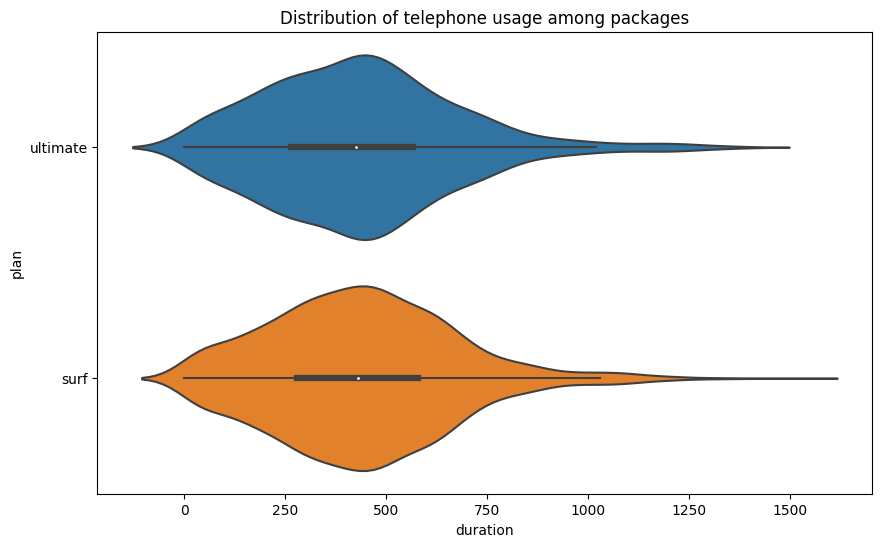

In [80]:
plt.figure(figsize=(10,6))
plt.title('Distribution of telephone usage among packages')
sns.violinplot(data=joined_dataset, x='duration', y='plan')
plt.show()

In [79]:
# descriptive statistics
descriptive_stats(joined_dataset, value_col='duration', group_col='plan')

Package: ultimate
Median: 425.0
Mean: 434.7
StdDev: 237.9
Variance: 56573.63224703341
-------------------------------------------
Package: surf
Median: 430.0
Mean: 436.5
StdDev: 229.3
Variance: 52571.06324345624
-------------------------------------------


**Findings**
- Users of both packages do not exhibit significantly different telephone usage behavior.
- This is evident from the data visualization and descriptive statistics of telephone usage for both packages, which show similar patterns.
- The mean and median telephone usage for both packages are around 400 minutes.

**Insight**
- The difference in the maximum duration of telephone calls can be modified to influence users' perception and behavior.

**Recommendation**
- For the cheaper package (Surf), the maximum duration of telephone calls can be reduced below the average (e.g., 300 minutes) to potentially increase profits.
- For the more expensive package (Ultimate), the maximum duration of telephone calls can be increased (e.g., to 3500 minutes). However, since the actual usage behavior of users does not exceed 1500 minutes, this change is not expected to result in any loss for Megaline company.

### 3.2 Message Usage <a id='msg_usage'></a>

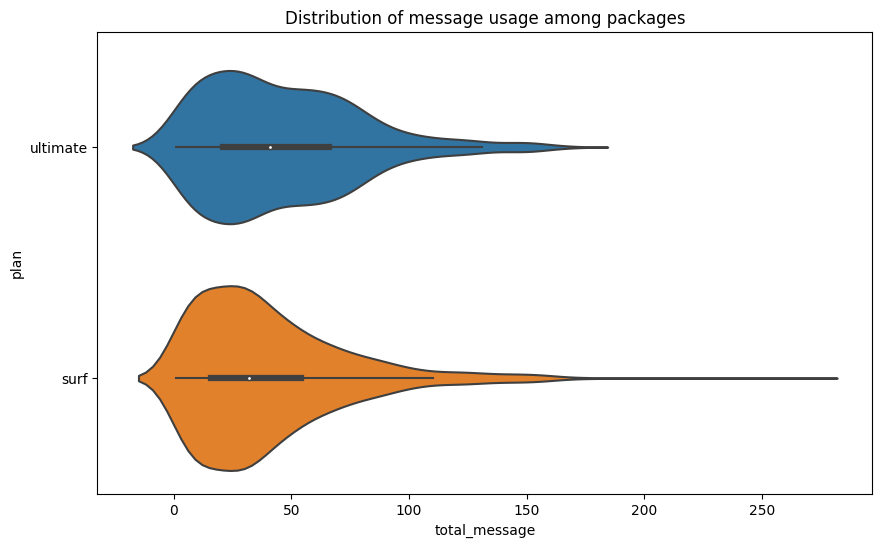

In [81]:
plt.figure(figsize=(10,6))
plt.title('Distribution of message usage among packages')
sns.violinplot(data=joined_dataset, x='total_message', y='plan')
plt.show()

In [82]:
# descriptive statistics
descriptive_stats(joined_dataset, value_col='total_message', group_col='plan')

Package: ultimate
Median: 41.0
Mean: 46.3
StdDev: 32.9
Variance: 1085.183107568317
-------------------------------------------
Package: surf
Median: 32.0
Mean: 40.1
StdDev: 33.0
Variance: 1091.3442310038054
-------------------------------------------


**Findings**
- Users of both packages have slightly different message usage behavior.
- This is evident from the data visualization and descriptive statistics of message usage in each package.
- In the Ultimate package, the user distribution tends to be more concentrated, as shown by the Mean and Median values close to each other (around 40).
- In the Surf package, the user distribution tends to be more spread out, as indicated by the difference between the Median and Mean values, and the maximum value reaching above 250.

**Insight**
- Adjusting the maximum total messages allowed could impact user behavior.

**Recommendation**
- For the cheaper package (Surf), the maximum total messages allowed could be reduced below the average (e.g., 30 SMS) to potentially increase profit.
- For the more expensive package (Ultimate), the maximum total messages allowed could be increased, for example, to 1200 SMS. Although there might be an increase in the maximum total messages, as long as user behavior does not exceed 200 messages, it would not result in losses for Megaline.

### 3.3 internet data quota <a id='quota_usage'></a>

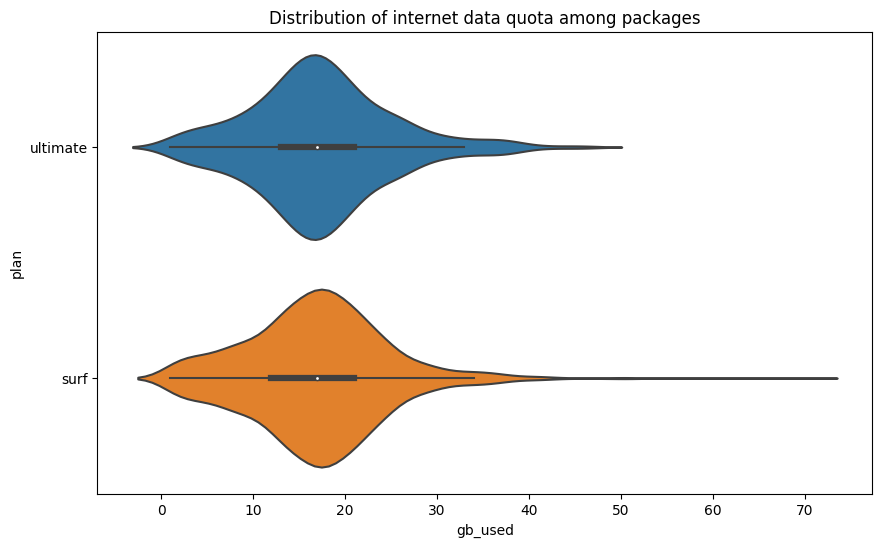

In [83]:
plt.figure(figsize=(10,6))
plt.title('Distribution of internet data quota among packages')
sns.violinplot(data=joined_dataset, x='gb_used', y='plan')
plt.show()

In [84]:
# descriptive statisctics
descriptive_stats(joined_dataset, value_col='gb_used', group_col='plan')

Package: ultimate
Median: 17.0
Mean: 17.3
StdDev: 7.6
Variance: 58.494733090294865
-------------------------------------------
Package: surf
Median: 17.0
Mean: 16.8
StdDev: 7.7
Variance: 59.473734090854755
-------------------------------------------


**Findings**
- Users of both packages have similar Median and Mean values, approximately around 17 GB.
- For the Ultimate package, the data usage distribution tends to be more concentrated. This is indicated by the close values of Mean and Median (around 17).
- For the Surf package, the data usage distribution tends to be more spread out. This is shown by the maximum value being above 70GB, with the Mean and Median around 17.

**Insight**
- Adjusting the maximum data quota can influence user behavior.

**Recommendation**
- For the cheaper package (Surf), the maximum data quota can be reduced below the average (e.g., 12 GB) to increase profit.
- For the more expensive package (Ultimate), the maximum data quota can be increased to 35GB. Although this may lead to a reduction in penalties for the Ultimate package, it is likely to result in an overall increase in profit.

### 3.4 User Revenue in NY-NJ region

In [85]:
# slicing data
NY_NJ = joined_dataset[joined_dataset['is_ny_nj'] == True]

In [86]:
# monthly profit for each package (exclude penalty)
monthly_profit = pd.pivot_table(NY_NJ, index='month', columns='plan', values='usd_monthly_pay', aggfunc='sum').reset_index()
monthly_profit

plan,month,surf,ultimate
0,2018-02,40.0,NaN
1,2018-03,120.0,NaN
2,2018-04,260.0,70.0
3,2018-05,340.0,70.0
4,2018-06,440.0,210.0
5,2018-07,560.0,350.0
6,2018-08,700.0,420.0
7,2018-09,780.0,560.0
8,2018-10,880.0,630.0
9,2018-11,980.0,910.0


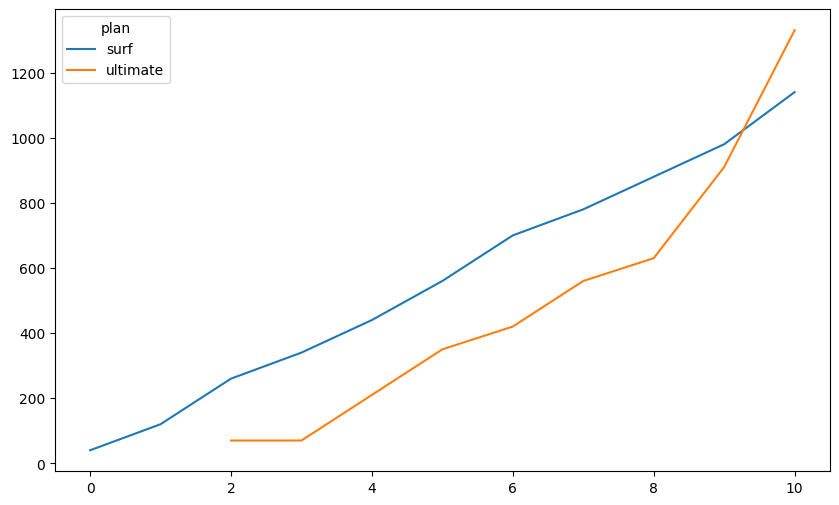

In [87]:
# profit distribution
monthly_profit.plot(figsize=(10, 6))
plt.show()

**Findings**
- From February to November, in the NY-NJ region, the revenue from the Ultimate package is higher than the Surf package.

**Insight**
- In the long run, the monthly revenue from the Ultimate package has the potential to exceed the revenue from the Surf package.

**Recommendation**
- Implement a loyalty program to encourage Ultimate package users to stay with the company for a longer period of time.

In [88]:
# total income for each package (include penalty)
total_income = pd.pivot_table(NY_NJ, index='month', columns='plan', values='total_income', aggfunc='sum').reset_index()
total_income

plan,month,surf,ultimate
0,2018-02,90.00,NaN
1,2018-03,246.84,NaN
2,2018-04,505.67,70.0
3,2018-05,793.37,70.0
4,2018-06,938.54,210.0
5,2018-07,1367.68,406.0
6,2018-08,1918.18,462.0
7,2018-09,2202.44,623.0
8,2018-10,2969.68,693.0
9,2018-11,3185.95,931.0


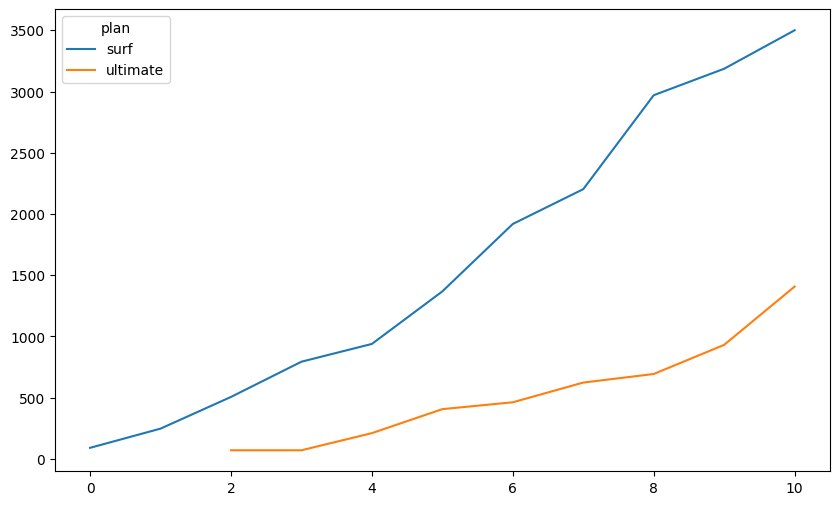

In [89]:
# total income distribution
total_income.plot(figsize=(10, 6))
plt.show()

**Findings**
- The high penalty charges result in a significantly higher total income in the NY-NJ region for the Surf package compared to the Ultimate package.

**Insight**
- The penalty charges have a significant impact on the overall increase in total income.

**Recommendation**
- Adjust the max values and penalty charges for each package to strategically increase overall profit.

### 3.5 User Revenue outside NY-NJ region <a id='revenue_ny_nj'></a>

In [90]:
# slicing data
outside_NY_NJ = joined_dataset[joined_dataset['is_ny_nj'] == False]
outside_NY_NJ

,user_id,month,duration,total_message,mb_used,age,reg_date,plan,churn_date,region,is_ny_nj,mb_per_month_included,usd_monthly_pay,gb_used,quota_exceeded_price,duration_exceeded_price,messages_exceeded_price,total_penalty,total_income
0,1000,2018-12,124.0,11.0,1901.47,45,2018-12-24,ultimate,NaT,GA,False,30720,70,2.0,0.0,0.0,0.00,0.00,70.00
1,1001,2018-08,182.0,30.0,6919.15,28,2018-08-13,surf,NaT,WA,False,15360,20,7.0,0.0,0.0,0.00,0.00,20.00
2,1001,2018-09,315.0,44.0,13314.82,28,2018-08-13,surf,NaT,WA,False,15360,20,14.0,0.0,0.0,0.00,0.00,20.00
3,1001,2018-10,393.0,53.0,22330.49,28,2018-08-13,surf,NaT,WA,False,15360,20,22.0,70.0,0.0,0.09,70.09,90.09
4,1001,2018-11,426.0,36.0,18504.30,28,2018-08-13,surf,NaT,WA,False,15360,20,19.0,40.0,0.0,0.00,40.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,1349,2018-11,NaN,72.0,17128.26,69,2018-10-01,surf,NaT,MA-NH,False,15360,20,17.0,20.0,0.0,0.66,20.66,40.66
2288,1349,2018-12,NaN,61.0,13039.91,69,2018-10-01,surf,NaT,MA-NH,False,15360,20,13.0,0.0,0.0,0.33,0.33,20.33
2289,1361,2018-05,NaN,2.0,1519.69,45,2018-04-14,surf,NaT,AL,False,15360,20,2.0,0.0,0.0,0.00,0.00,20.00
2291,1108,2018-12,NaN,NaN,233.17,45,2018-12-30,ultimate,NaT,UT,False,30720,70,1.0,0.0,0.0,0.00,0.00,70.00


In [91]:
# monthly profit (exclude penalty)
profit_outside_NY_NJ = pd.pivot_table(outside_NY_NJ, index='month', columns='plan', values='usd_monthly_pay', aggfunc='sum').reset_index()
profit_outside_NY_NJ

plan,month,surf,ultimate
0,2018-01,40,280
1,2018-02,140,490
2,2018-03,340,840
3,2018-04,740,1400
4,2018-05,1200,1960
5,2018-06,1500,3080
6,2018-07,1860,3780
7,2018-08,2540,4550
8,2018-09,3100,5460
9,2018-10,3860,6790


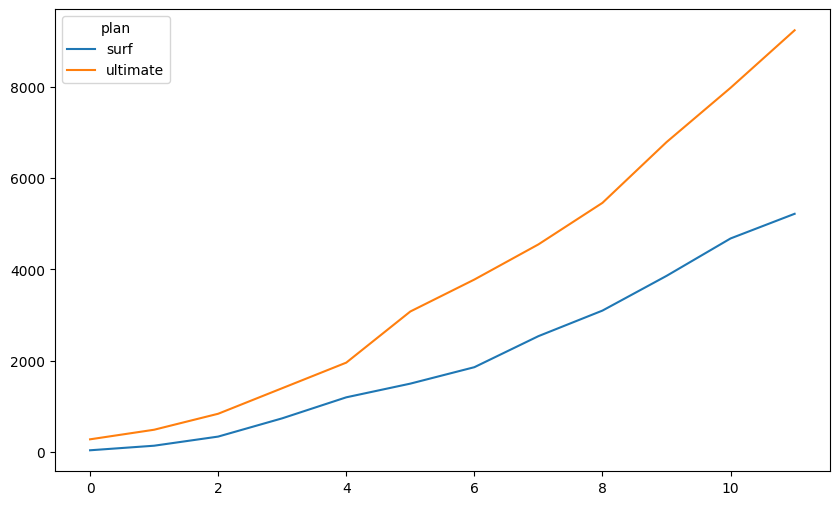

In [92]:
# monthly profit distribution
profit_outside_NY_NJ.plot(figsize=(10, 6))
plt.show()

**Findings**
- The income from monthly fees outside the NY-NJ region is higher for the ultimate package.

**Insight**
- Since there are more users of the ultimate package outside the NY-NJ region, it can be focused on increasing the number of ultimate package users.

**Recommendation**
- Implement a loyalty program to encourage ultimate package users to stay for a longer period.

In [93]:
# total income (include penalty)
total_income_outside_NY_NJ = pd.pivot_table(outside_NY_NJ, index='month', columns='plan', values='total_income', aggfunc='sum').reset_index()
total_income_outside_NY_NJ

plan,month,surf,ultimate
0,2018-01,40.00,280.0
1,2018-02,219.57,490.0
2,2018-03,809.81,896.0
3,2018-04,1529.86,1463.0
4,2018-05,2874.00,1981.0
5,2018-06,3841.26,3157.0
6,2018-07,6215.88,3836.0
7,2018-08,8438.67,4711.0
8,2018-09,9102.23,5572.0
9,2018-10,12535.15,6972.0


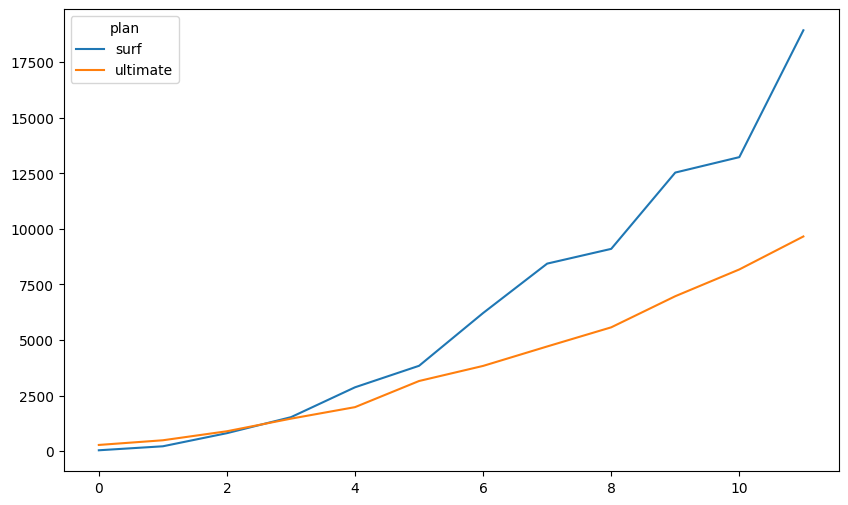

In [94]:
# total income distribution
total_income_outside_NY_NJ.plot(figsize=(10, 6))
plt.show()

**Findings**
- The high penalty leads to a significantly higher total income for the Surf package outside the NY-NJ region compared to the Ultimate package.

**Insight**
- Penalties have a significant impact on increasing the total income.

**Recommendation**
- Adjusting the maximum value and penalty rates for each package can potentially increase overall profit.

### 3.6 Number of Users in NY-NJ region and outside NY-NJ region <a id='revenue_outside_ny_nj'></a>

In [95]:
users_per_city = pd.pivot_table(df_users, index = 'is_ny_nj', columns = 'plan', values = 'user_id', aggfunc = 'count', margins = True).reset_index().iloc[0:2]
users_per_city['%surf'] = users_per_city['surf'] / users_per_city['All']
users_per_city['%ultimate'] = users_per_city['ultimate'] / users_per_city['All']
users_per_city

plan,is_ny_nj,surf,ultimate,All,%surf,%ultimate
0,False,279,141,420,0.664286,0.335714
1,True,60,20,80,0.750000,0.250000


**Findings**
- There are more Ultimate users outside the NY-NJ region.
- There are more Surf users within the NY-NJ region.

**Insight**
- Two distinct market segments have formed, one within the NY-NJ region and the other outside the NY-NJ region. People within the NY-NJ region tend to choose more cost-effective internet packages.

**Recommendation**
- Focus on increasing Surf users in the NY-NJ region and Ultimate users outside the NY-NJ region.

### 3.7 Penalty Distribution for each package <a id='penalyt_distribution'></a>

#### call duration

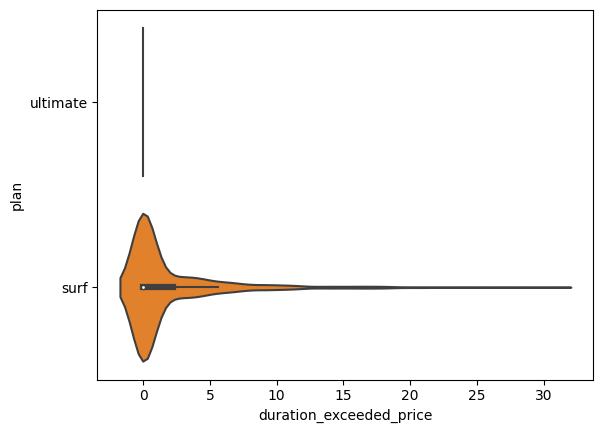

In [96]:
# call duration exceeded
sns.violinplot(data=joined_dataset, x='duration_exceeded_price', y='plan')
plt.show()

In [97]:
# the likelihood of 'Surf' users exceeding their call duration
len(joined_dataset.loc[(joined_dataset['plan']=='surf') & (joined_dataset['duration_exceeded_price']> 0)]) / len(joined_dataset.loc[(joined_dataset['plan']=='surf')])

0.35982199618563254

In [98]:
# the likelihood of 'ultimate' users exceeding their call duration
len(joined_dataset.loc[(joined_dataset['plan']=='ultimate') & (joined_dataset['duration_exceeded_price']> 0)]) / len(joined_dataset.loc[(joined_dataset['plan']=='ultimate')])

0.0

**Findings**
- Ultimate users did not exceed the phone call duration, so no penalty was applied.
- Surf users dominate the penalty application due to exceeding the maximum allowed phone call duration.
- The likelihood of Surf users exceeding their phone call usage is 30%.

**Insight**
- With the high penalty rate for Surf users, it is possible to adjust the penalty rate and the maximum value.

**Recommendation**
- Create additional phone call packages for Surf users.

#### sent messages

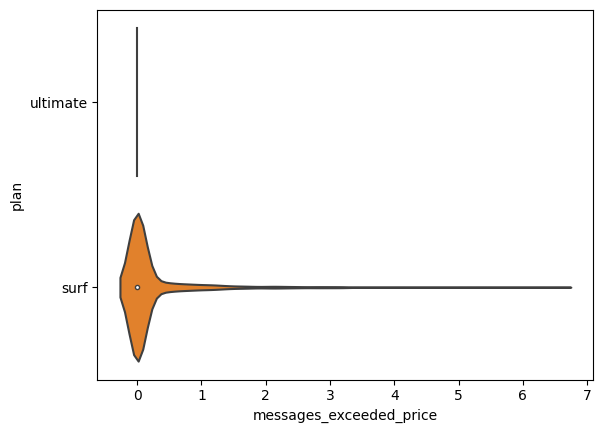

In [99]:
# sent messages exceeded
sns.violinplot(data=joined_dataset, x='messages_exceeded_price', y='plan')
plt.show()

In [100]:
# the likelihood of 'Surf' users exceeding their sent messages
len(joined_dataset.loc[(joined_dataset['plan']=='surf') & (joined_dataset['messages_exceeded_price']> 0)]) / len(joined_dataset.loc[(joined_dataset['plan']=='surf')])

0.2161474888747616

In [101]:
# the likelihood of 'ultimate' users exceeding their sent messages
len(joined_dataset.loc[(joined_dataset['plan']=='ultimate') & (joined_dataset['messages_exceeded_price']> 0)]) / len(joined_dataset.loc[(joined_dataset['plan']=='ultimate')])

0.0

**Findings**
- Ultimate users did not exceed the SMS usage, so no penalty was applied.
- Surf users dominate the penalty application due to exceeding the maximum allowed SMS usage.
- The likelihood of Surf users exceeding their SMS usage is 21%.

**Insight**
- With the high penalty rate for Surf users, it is possible to adjust the penalty rate and the maximum value.

**Recommendation**
- Create additional SMS packages for Surf users.

#### quota internet

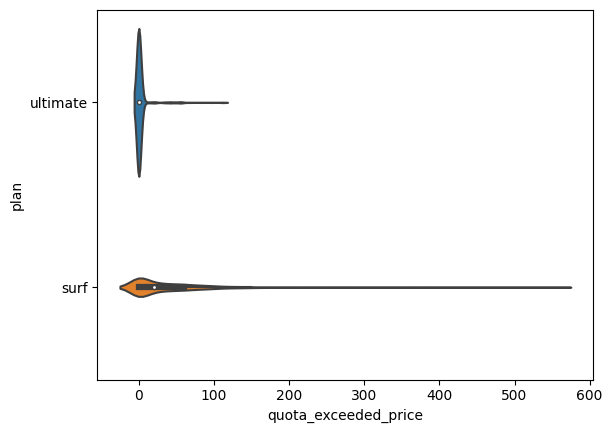

In [102]:
# quota exceeded
sns.violinplot(data=joined_dataset, x='quota_exceeded_price', y='plan')
plt.show()

In [100]:
# the likelihood of 'surf' users exceeding their internet quota
len(joined_dataset.loc[(joined_dataset['plan']=='surf') & (joined_dataset['quota_exceeded_price']> 0)]) / len(joined_dataset.loc[(joined_dataset['plan']=='surf')])

0.5791481246026701

In [103]:
# the likelihood of 'ultimate' users exceeding their internet quota
len(joined_dataset.loc[(joined_dataset['plan']=='ultimate') & (joined_dataset['quota_exceeded_price']> 0)]) / len(joined_dataset.loc[(joined_dataset['plan']=='ultimate')])

0.05694444444444444

**Findings**
- Surf users still dominate the penalty for exceeding the data usage, reaching up to 600 USD.
- Surf users dominate the penalty application due to exceeding the maximum allowed data usage.
- The likelihood of Surf users exceeding their data usage is 57%, and the likelihood of Ultimate users exceeding their data usage is 5%.

**Insight**
- With the high penalty rate for Surf users, it is possible to adjust the penalty rate and the maximum value.

**Recommendation**
- Create additional data packages for Surf users.

## 4 Hypotheses Testing <a id='hypotheses'></a>

[Back to Contents](#back)

**Hypothesis testing method is as follows:**

1. Determination of the null hypothesis and alternative hypothesis.

- The null hypothesis (H0) is a hypothesis that states that there is no significant relationship between the variables.

- The alternative hypothesis (H1) is a hypothesis that states that there is a significant effect or relationship between the variables.

2. Determine the error rate (alpha). For a sample of 500, a 5% error rate is usually sufficient. Alpha represents the level of significance at which chance can be accepted.

3. Choose the testing method (independent t-test, two-sided, one-sided).

4. Prepare the dataset for testing.

5. Input the dataset into the hypothesis testing method.

6. The p-value is obtained (the probability of the observed results being due to chance) and then compared with alpha.
    - If the p-value >= alpha: H0 is accepted. The probability is high, so the assumption is rejected.
    - If the p-value < alpha: H0 is rejected.

7. Draw conclusions based on the p-value and alpha.

### 4.1 Hypothesis 1: The average income of users of the Ultimate and Surf phone packages is not the same. <a id='avg_income'></a>

H0: The average usage of the Ultimate and Surf phone packages is the same.

H1: The average usage of the Ultimate and Surf phone packages is not the same.

Alpha = 5%

Method = Independent T-test (Mean of 2 populations)

In [104]:
# sample
joined_dataset['plan'].value_counts()

plan
surf        1573
ultimate     720
Name: count, dtype: int64

In [106]:
# Preparing dataset
surf_telepon = joined_dataset.loc[joined_dataset['plan']=='surf', 'duration'].dropna()
ultimate_telepon = joined_dataset.loc[joined_dataset['plan']=='ultimate', 'duration'].dropna()

In [107]:
# p-value
p_value = st.ttest_ind(surf_telepon, ultimate_telepon, equal_var = False).pvalue
p_value

0.8625535206894872

In [108]:
alpha = 0.05
print(f'P-value: {p_value * 100:0.2f}%')
if p_value >= alpha:
    print('H0 is accepted')
elif p_value < alpha:
    print('H0 is rejected')

P-value: 86.26%
H0 is accepted


**Verdict**

The usage of phone packages in both Surf and Ultimate packages is the same.
This means that despite subscribing to different packages, user behavior in phone call duration is the same for both packages.

**Insight**

Creating an extra package to meet the over-duration needs in the Surf package.

### 4.2 Hypothesis 2: The average income of users in the NY-NJ region differs from the income of users from other regions. <a id='ny_nj_income_differs'></a>

H0: The average income of Surf and Ultimate package users is the same.

H1: The average income of Surf and Ultimate package users is not the same.

Alpha = 5%

Method = Independent T-test (Mean of 2 populations)

In [109]:
# preparing dataset
surf_income = joined_dataset.loc[joined_dataset['plan']=='surf', 'total_income'].dropna()
ultimate_income = joined_dataset.loc[joined_dataset['plan']=='ultimate', 'total_income'].dropna()

In [110]:
# p-value
p_value2 = st.ttest_ind(surf_income, ultimate_income, equal_var = False).pvalue
p_value2

3.1703905481135734e-15

In [111]:
alpha = 0.05
print(f'P-value: {p_value2 * 100:0.2f}%')
if p_value2 >= alpha:
    print('H0 is accepted')
elif p_value2 < alpha:
    print('H0 is rejected')

P-value: 0.00%
H0 is rejected


**Verdict**

The total income from the Surf and Ultimate packages differs.
Meaning: Due to the difference in rates for each package, the number of users and pricing strategies, as well as penalty costs, have a significant impact.

**Insight**

Penalty costs have a considerable influence on the total income. Surf users still account for the majority of the penalties that need to be paid. Adjusting the penalty fees could potentially increase profits.

### 4.3 Hyphotesis 3: The average income of users in the NY-NJ region is the same as the income of users from other regions. <a id='ny_nj_income_thesame'></a>

H0: The average income of users in the NY-NJ region is the same as the income of users from other regions.

H1: The average income of users in the NY-NJ region is not the same as the income of users from other regions.

Alpha = 5%

Method = Independent T-test (Mean of 2 populations)

In [112]:
# Preparing dataset
income_NY_NJ = joined_dataset.loc[joined_dataset['is_ny_nj']== True, 'total_income'].dropna()
income_outside_NY_NJ = joined_dataset.loc[joined_dataset['is_ny_nj']== False, 'total_income'].dropna()

In [113]:
# p-value
p_value3 = st.ttest_ind(income_NY_NJ, income_outside_NY_NJ, equal_var = False).pvalue
p_value3

0.0335256158853001

In [114]:
alpha = 0.05
print(f'P-value: {p_value3 * 100:0.2f}%')
if p_value3 >= alpha:
    print('H0 is accepted')
elif p_value3 < alpha:
    print('H0 is rejected')

P-value: 3.35%
H0 is rejected


**Verdict**

The income of users in the NY-NJ region differs from the income of users from other regions.
Meaning: NY-NJ has its own identity compared to other regions. This will affect the marketing strategies implemented.

**Insight**

The thrifty behavior in the NY-NJ region serves as a benchmark to focus on increasing Surf users in the NY-NJ region.

# General Conclusion <a id='end'></a>

1. Penalties have a significant impact on the total income for both packages, both in the NY-NJ region and outside the NY-NJ region. Surf users dominate the number of penalty payments, presenting an opportunity to create extra max value for Surf users.

2. Due to the considerable gap between the two packages, it is also worth considering the creation of a new package that falls in between them.

3. Despite the higher subscription cost, the highest income is obtained from Surf users.

4. The accepted H1 hypotheses are as follows:
    - The average income of Surf and Ultimate package users differs.
    - The average income of users in the NY-NJ region differs from the income of users from other regions.
    

5. The NY-NJ region is a potential area as it is dominated by Surf users.

[Back to Contents](#back)